# 20220121 Initial Analysis

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import numpy as np
from importlib import reload
from imaka.analysis import plot_stats
from imaka.analysis import plot_redu
from imaka.reduce import util
from astropy.stats import sigma_clipped_stats

## Edit Me
from imaka.reduce.nights import reduce_2022_01_21 as redu
night = '20220121'
fld = 'Beehive-W'

root_dir = redu.root_dir
stats_dir = root_dir + "reduce/stats/"
plots_dir = root_dir + "reduce/plots/"
stack_dir = root_dir + "reduce/stacks/"

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
## Had an issue with stacking, the gfol
for key in list(redu.dict_images.keys()):
    for i in range(len(redu.dict_images[key])):
        img_num = redu.dict_images[key]
        suf = redu.dict_suffix[key]
        test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)
        
        stars = Table.read(root_dir + f'reduce/{fld}/' + test_img_base + '_clean_stars_stats_mdp.fits')
        print(f"key: {key} image {img_num[i]} stars: {len(stars)}")  

key: LS_5wfs image 20 stars: 153
key: LS_5wfs image 23 stars: 145
key: LS_5wfs image 26 stars: 137
key: LS_5wfs image 29 stars: 114
key: LS_5wfs image 32 stars: 135
key: LS_5wfs image 46 stars: 130
key: LS_5wfs image 50 stars: 101
key: LS_5wfs image 54 stars: 134
key: LS_5wfs image 64 stars: 105
key: LS_5wfs image 68 stars: 121
key: LS_5wfs image 72 stars: 113
key: LS_3wfs_s image 21 stars: 117
key: LS_3wfs_s image 24 stars: 153
key: LS_3wfs_s image 27 stars: 131
key: LS_3wfs_s image 30 stars: 117
key: LS_3wfs_s image 33 stars: 154
key: LS_3wfs_s image 47 stars: 116
key: LS_3wfs_s image 51 stars: 123
key: LS_3wfs_s image 55 stars: 107
key: LS_3wfs_s image 65 stars: 102
key: LS_3wfs_s image 69 stars: 136
key: LS_3wfs_s image 73 stars: 120
key: LS_3wfs_w image 48 stars: 125
key: LS_3wfs_w image 52 stars: 119
key: LS_3wfs_w image 56 stars: 109
key: LS_3wfs_w image 66 stars: 118
key: LS_3wfs_w image 74 stars: 111
key: open image 22 stars: 56
key: open image 28 stars: 63
key: open image 31 

## Reduction inputs

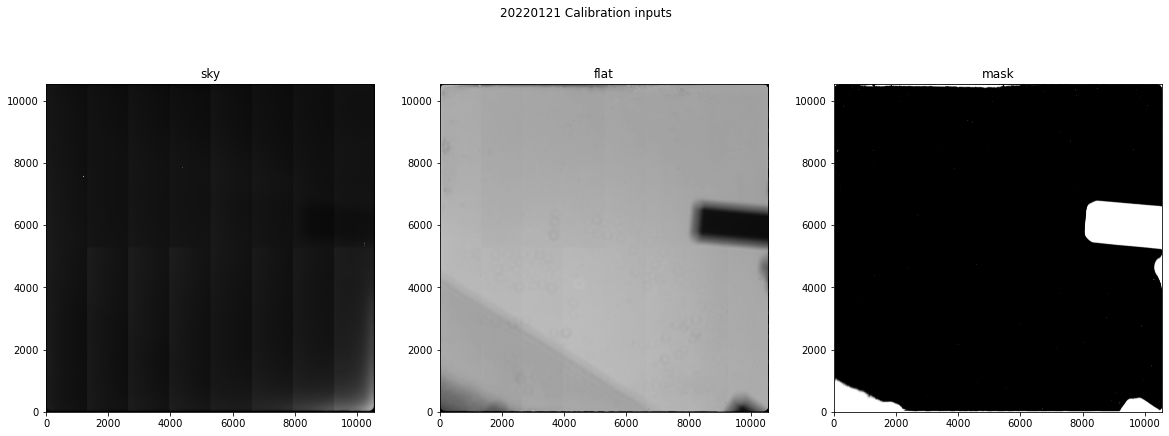

In [19]:
## sky, flats, and mask
sky_f = redu.sky_dir + "beehive_sky.fits"
flat_f = redu.calib_dir + "domeflat.fits"
mask_f = redu.calib_dir + "domemask.fits"

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(20,7))
fig.suptitle(night + ' Calibration inputs')

ax0.set_title('sky')
image_data = fits.getdata(sky_f)
ax0.imshow(image_data, cmap='gray', vmin=0, vmax=1000, origin='lower')

ax1.set_title('flat')
image_data = fits.getdata(flat_f)
ax1.imshow(image_data, cmap='gray', vmin=0, vmax=1.5, origin='lower')

ax2.set_title('mask')
image_data = fits.getdata(mask_f)
ax2.imshow(image_data, cmap='gray', vmin=0, vmax=1, origin='lower')

plt.show()

## Real time plots

In [3]:
# Enter chosen file
test_img_base = 'sta029n5wfs_c_scan' # this is the test single code

In [5]:
# pick a file based on key
key = 'LS_3wfs_s'
i=1

img_num = redu.dict_images[key]
suf = redu.dict_suffix[key]
test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)

50% EE radius = 0.250"


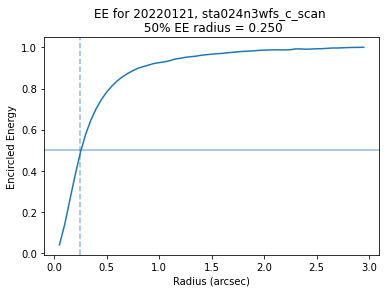

In [6]:
plot_redu.plot_ee_50(test_img_base, root_dir, fld, night)

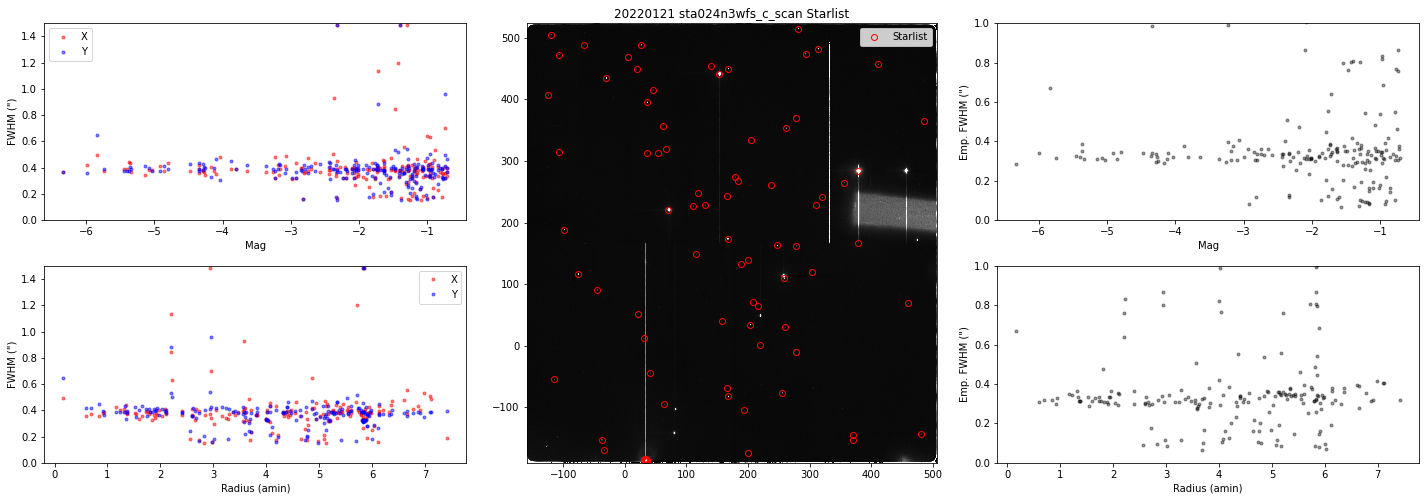

x: fwhm_x_avg = 0.36" fwhm_x_med = 0.38" fwhm_x_std = 0.07"
x: fwhm_x_avg = 0.36" fwhm_x_med = 0.38" fwhm_x_std = 0.07"


In [7]:
plot_redu.plot_starlist_stats(test_img_base, root_dir, fld, night)

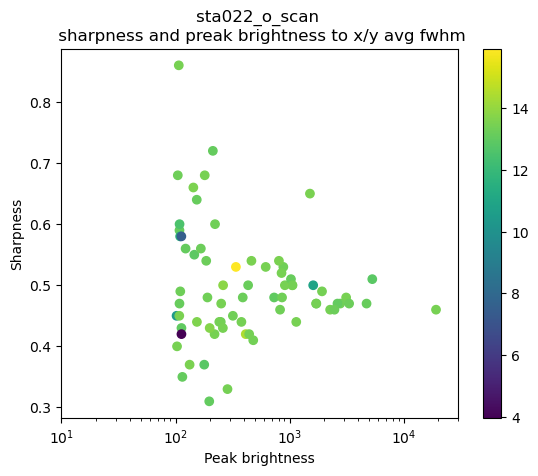

In [39]:
# num pix vs fwhm
stars = Table.read(root_dir + f'reduce/{fld}/' + test_img_base + '_clean_stars.txt', format='ascii')
plt.scatter(stars['peak'], stars['sharpness'], c=np.average([stars['x_fwhm'], stars['y_fwhm']], axis=0))
plt.xlim(10, 30000)
plt.xscale('log')
plt.xlabel("Peak brightness")
plt.ylabel("Sharpness")
plt.title(test_img_base+ " \n sharpness and preak brightness to x/y avg fwhm")
plt.colorbar()

## Night-Long Stats

In [10]:
stats = Table.read(root_dir + 'reduce/stats/stats_LS_5wfs.fits')

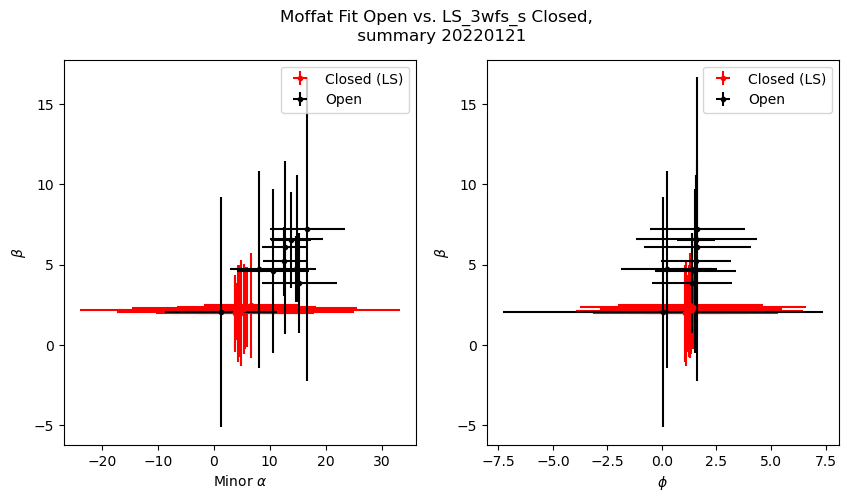

In [42]:
reload(plot_redu)
c_key = "LS_3wfs_s"
plot_redu.plot_moffat_fit(root_dir, c_key, fld, night, o_key = "open")

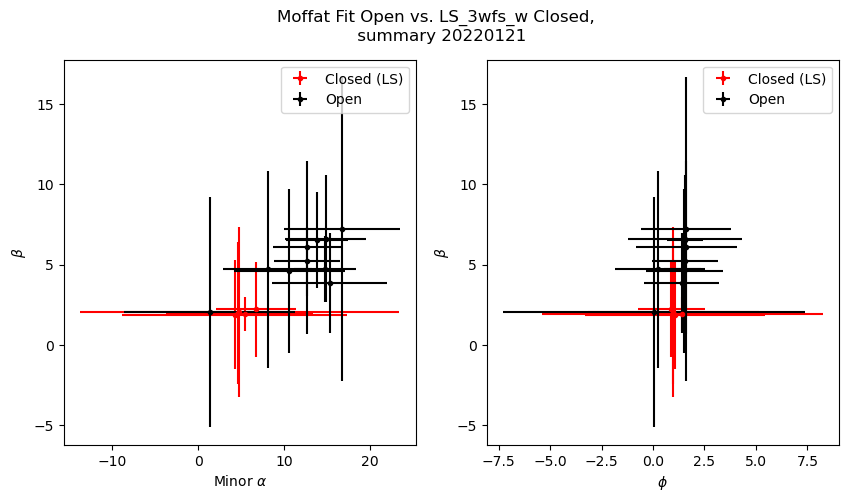

In [43]:
reload(plot_redu)
c_key = "LS_3wfs_w"
plot_redu.plot_moffat_fit(root_dir, c_key, fld, night, o_key = "open")

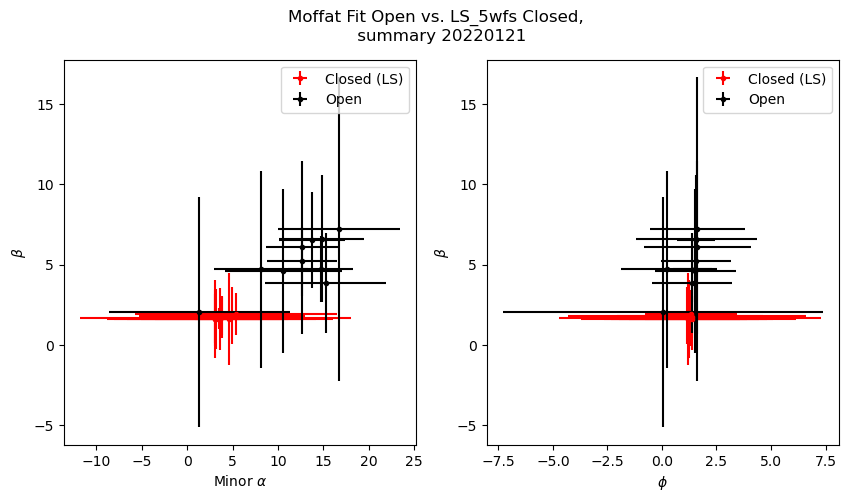

In [44]:
reload(plot_redu)
c_key = "LS_5wfs"
plot_redu.plot_moffat_fit(root_dir, c_key, fld, night, o_key = "open")

## Star STATS

In [50]:
suffixes = list(redu.dict_suffix.keys())
suffixes

['open', 'LS_3wfs_s', 'LS_3wfs_w', 'LS_5wfs']

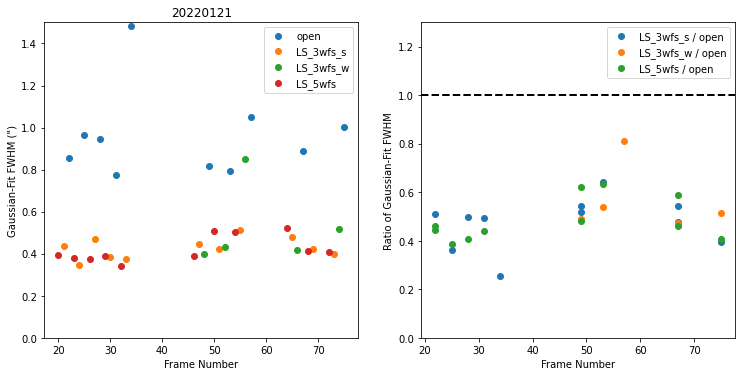

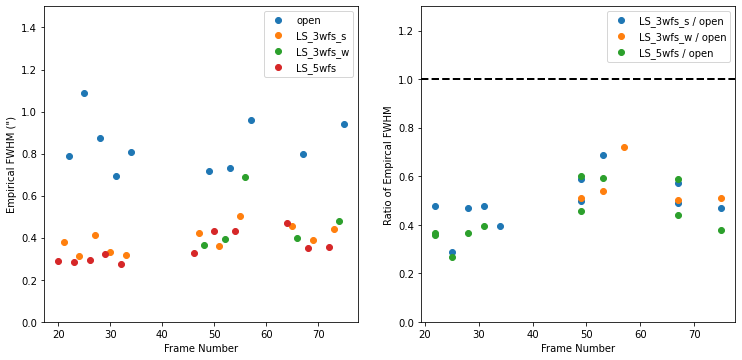

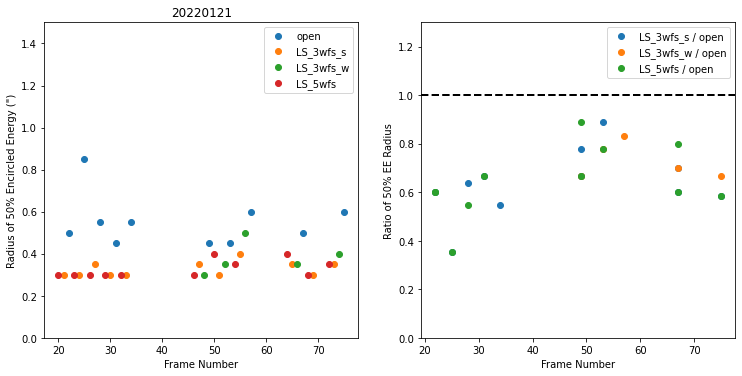

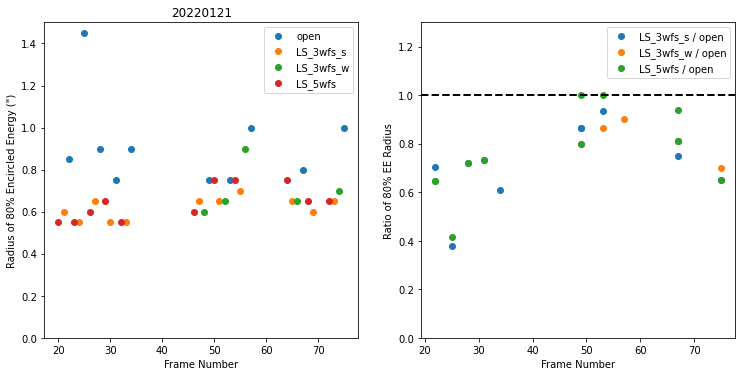

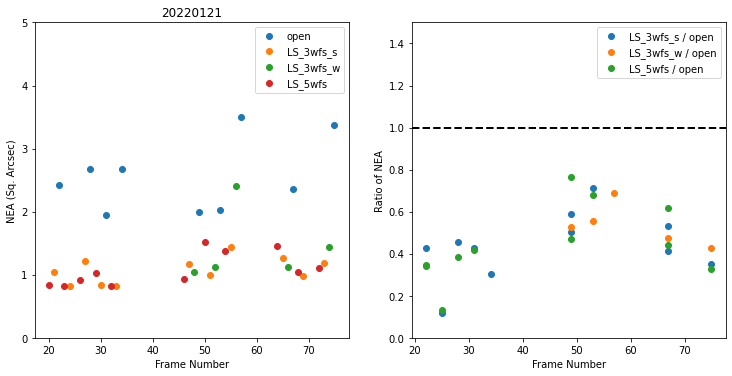

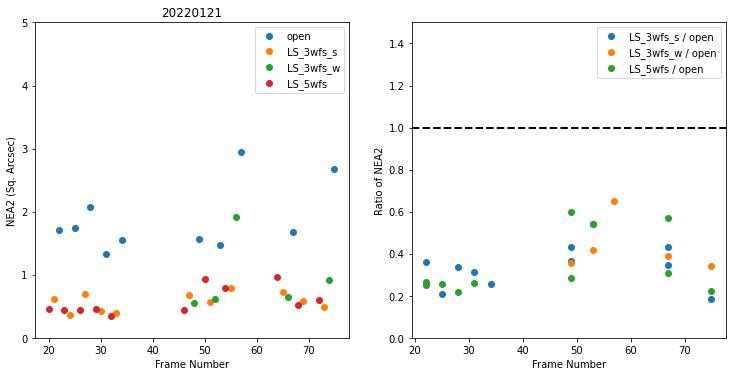

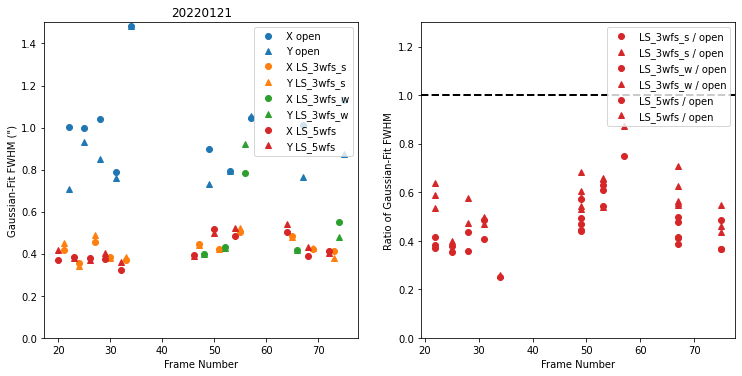

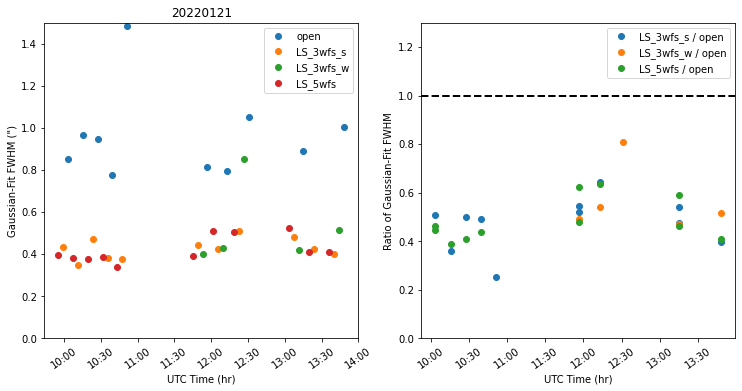

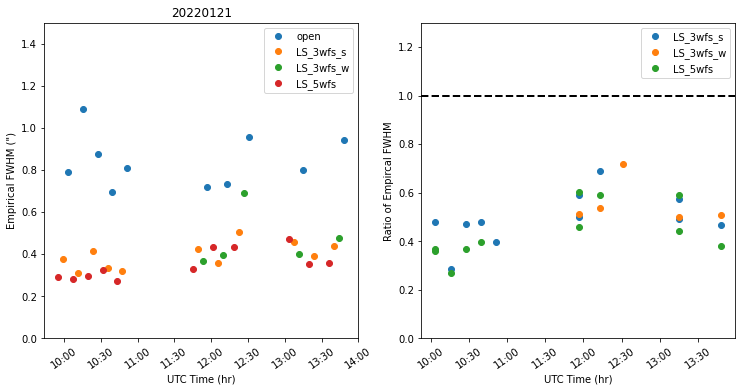

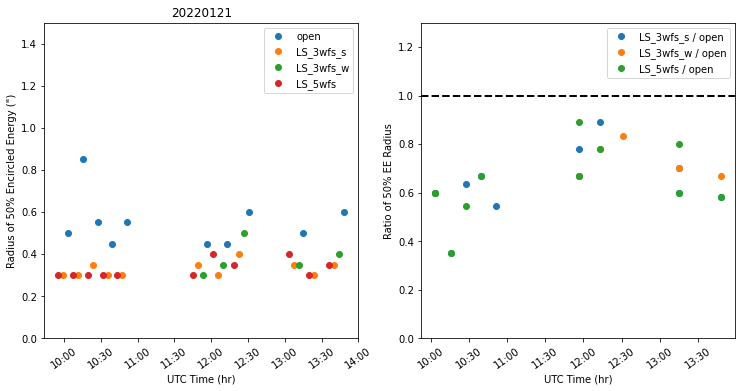

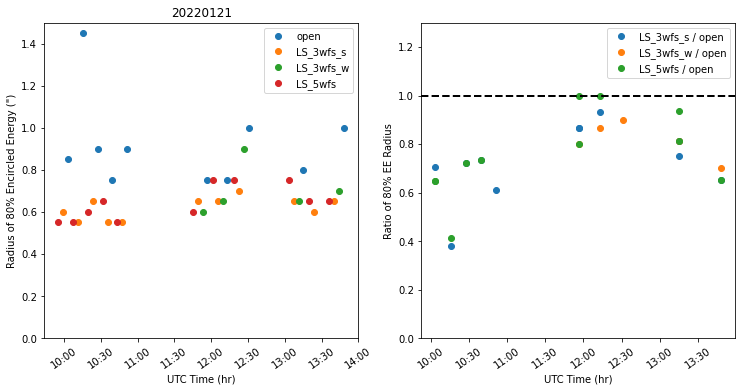

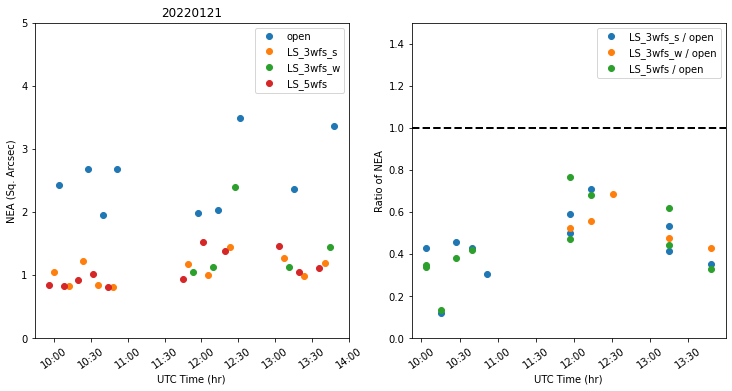

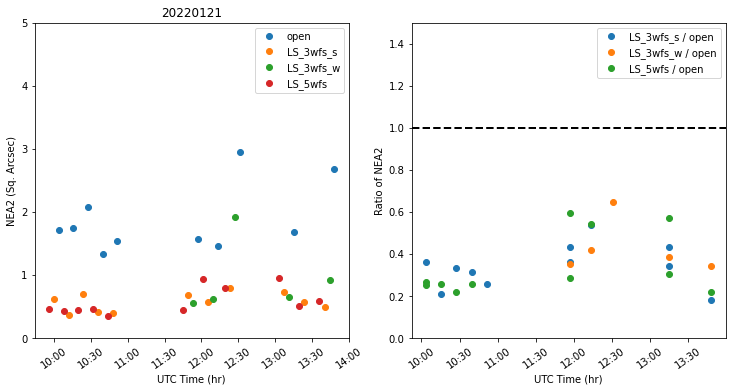

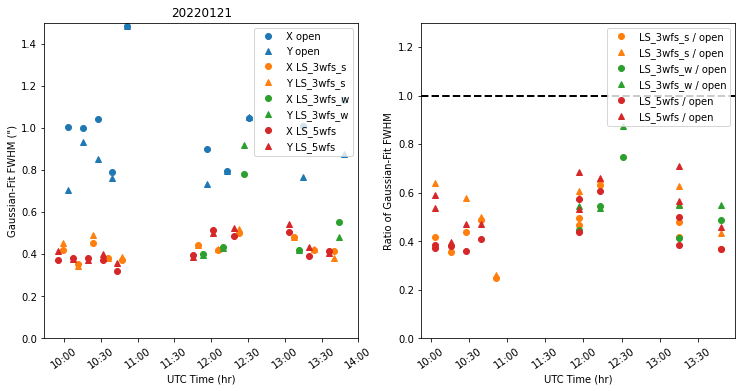

In [84]:
suffixes = ['open', 'LS_3wfs_s', 'LS_3wfs_w', 'LS_5wfs']
plot_stats.plot_stack_stats(night, suffixes=suffixes, root_dir=root_dir + '../../', reduce_dir='sta/reduce/')

# Time Variation w/MASS-DIMM

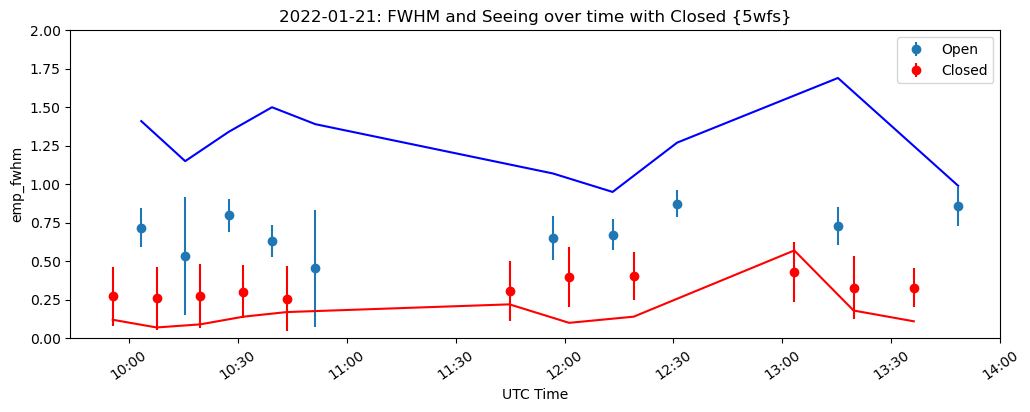

In [45]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file2 = stats_dir+ "stats_LS_5wfs_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file2, 'emp_fwhm', "2022-01-21: FWHM and Seeing over time with Closed {5wfs}", plots_dir)

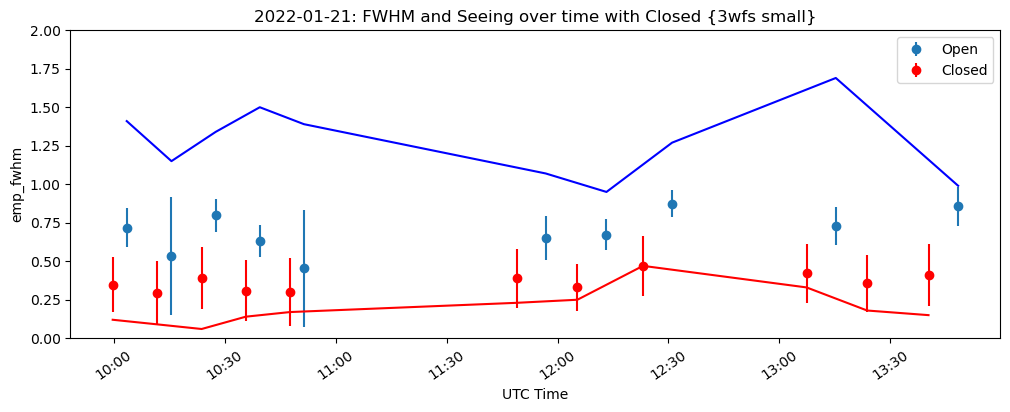

In [47]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file1 = stats_dir+ "stats_LS_3wfs_s_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file1, 'emp_fwhm', "2022-01-21: FWHM and Seeing over time with Closed {3wfs small}", plots_dir)

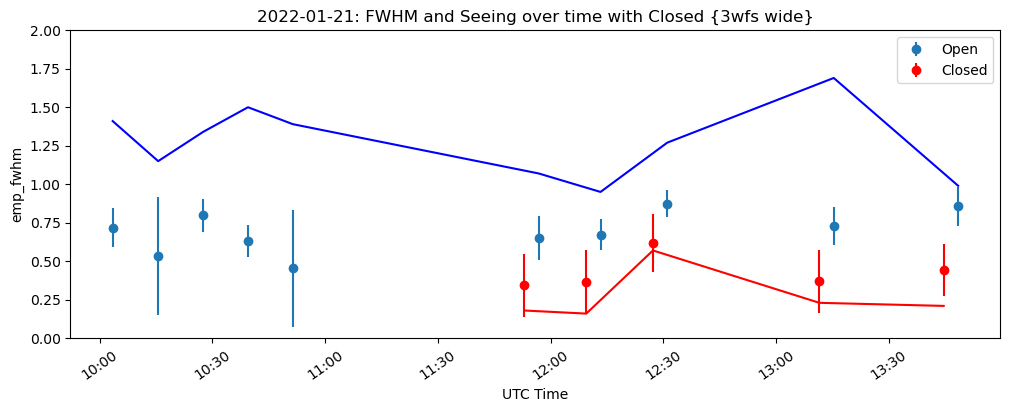

In [48]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file1 = stats_dir+ "stats_LS_3wfs_w_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file1, 'emp_fwhm', "2022-01-21: FWHM and Seeing over time with Closed {3wfs wide}", plots_dir)

# Aggregate Plots

['/g/lu/data/imaka/onaga/20220121/sta/reduce/stats/stats_open_mdp.fits', '/g/lu/data/imaka/onaga/20220121/sta/reduce/stats/stats_LS_3wfs_s_mdp.fits', '/g/lu/data/imaka/onaga/20220121/sta/reduce/stats/stats_LS_3wfs_w_mdp.fits', '/g/lu/data/imaka/onaga/20220121/sta/reduce/stats/stats_LS_5wfs_mdp.fits']


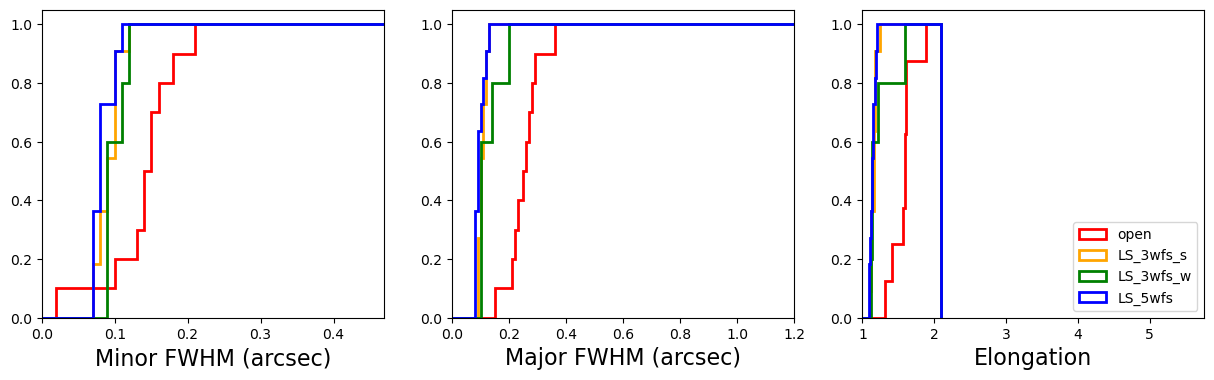

In [51]:
files = [stats_dir + 'stats_' + suffix + '_mdp.fits' for suffix in suffixes]
print(files)
colors = ['red', 'orange', 'green', 'blue', 'lightgreen', 'cyan']
plot_stats.comp_cdf(files, suffixes, colors)

# Field Variability

## Closed loop, single exposure

sta021n3wfs_c_scan
Median FWHM           = 0.354"
Median FWHM (clipped) = 0.350"
Mean FWHM             = 0.468"
Mean FWHM (clipped)   = 0.347"
Stddev FWHM           = 0.587"
Stddev FWHM (clipped) = 0.026"


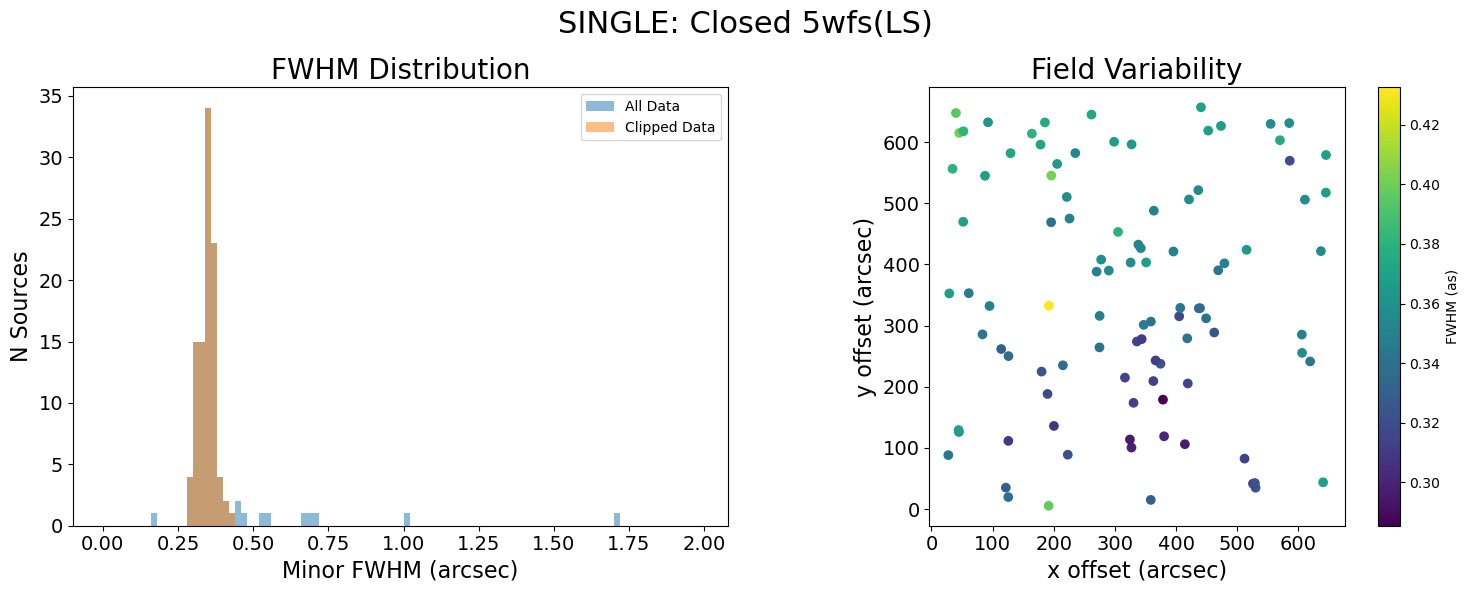

In [56]:
from importlib import reload
reload(plot_stats)
test_img_base = "sta021n3wfs_c_scan"
print(test_img_base)
img_file = root_dir + f'reduce/{fld}/{test_img_base}_clean.fits'
starlist = root_dir +  f'reduce/{fld}/{test_img_base}_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, "SINGLE: Closed 5wfs(LS)")

sta022_o_scan
Median FWHM           = 0.558"
Median FWHM (clipped) = 0.559"
Mean FWHM             = 0.540"
Mean FWHM (clipped)   = 0.558"
Stddev FWHM           = 0.079"
Stddev FWHM (clipped) = 0.015"


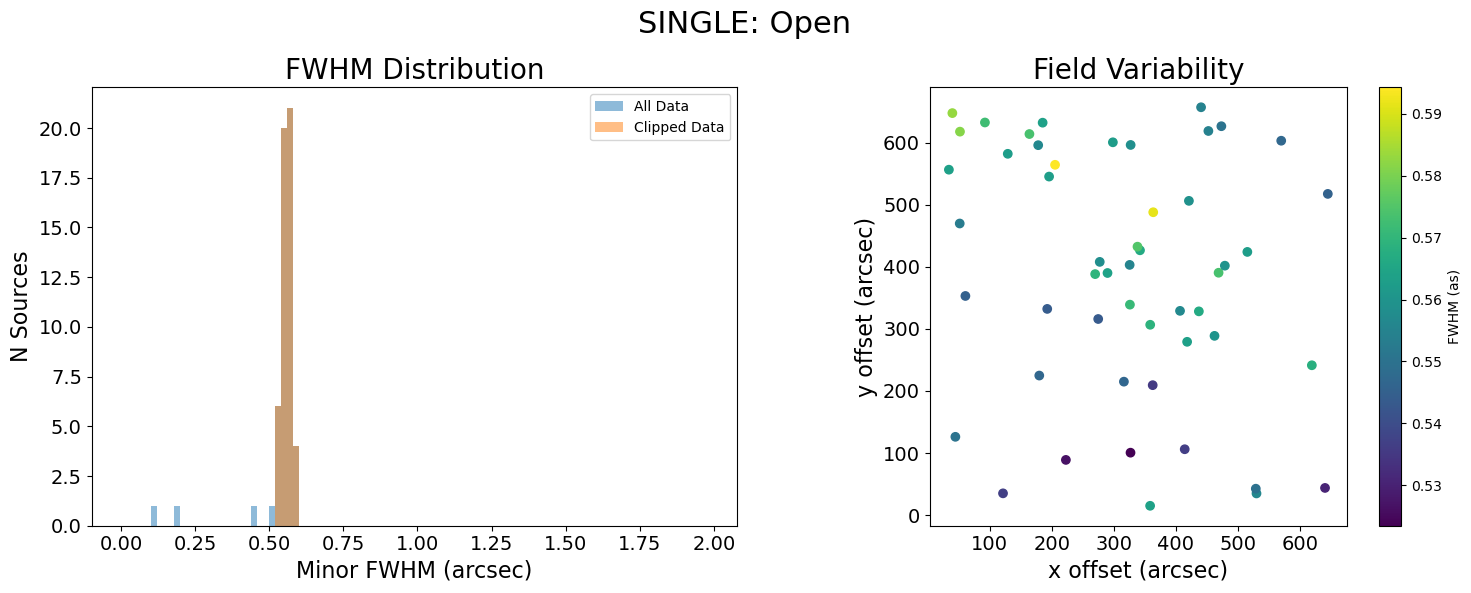

In [54]:
from importlib import reload
reload(plot_stats)
test_img_base = "sta022_o_scan"
print(test_img_base)
img_file = root_dir + f'reduce/{fld}/{test_img_base}_clean.fits'
starlist = root_dir +  f'reduce/{fld}/{test_img_base}_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, "SINGLE: Open")

### Open Loop

Median FWHM           = 0.581"
Median FWHM (clipped) = 0.559"
Mean FWHM             = 0.648"
Mean FWHM (clipped)   = 0.399"
Stddev FWHM           = 1.099"
Stddev FWHM (clipped) = 0.293"


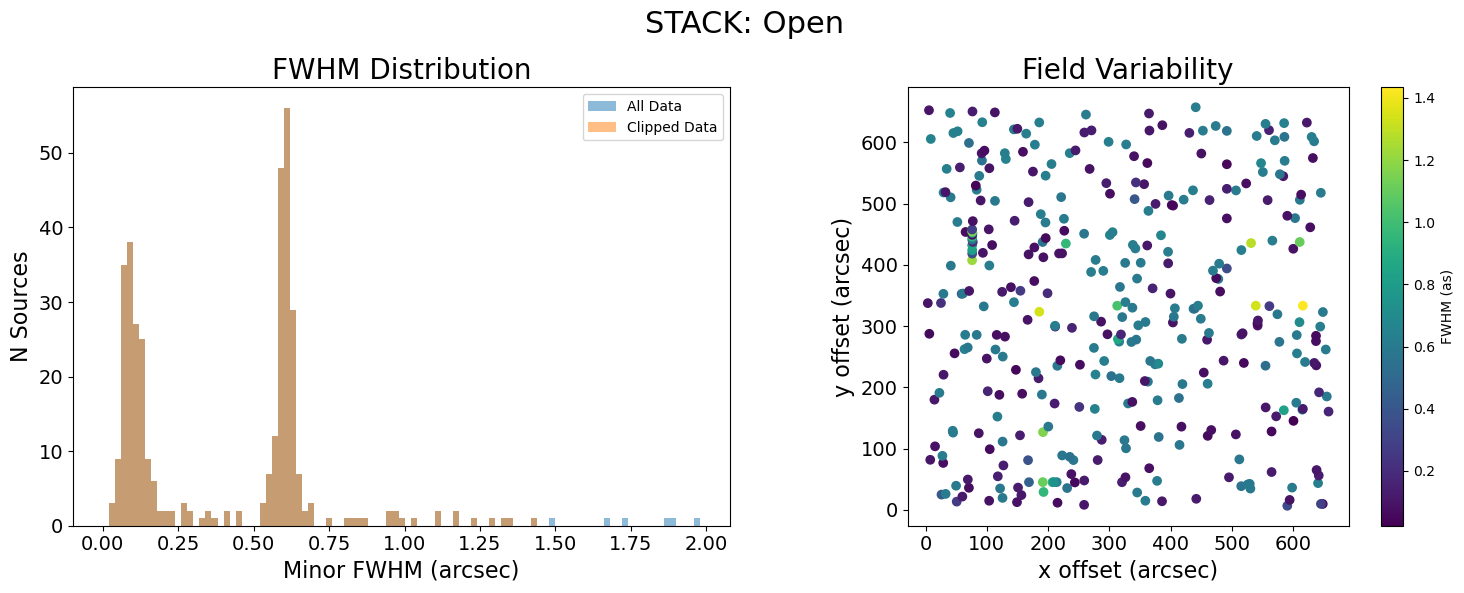

In [57]:
img_file = stack_dir + 'beehive_stack__o.fits' 
starlist = stack_dir + 'beehive_stack__o_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, "STACK: Open")

### Closed loop (3wfs_s)

Median FWHM           = 0.170"
Median FWHM (clipped) = 0.166"
Mean FWHM             = 32575.878"
Mean FWHM (clipped)   = 0.387"
Stddev FWHM           = 885147.456"
Stddev FWHM (clipped) = 0.758"


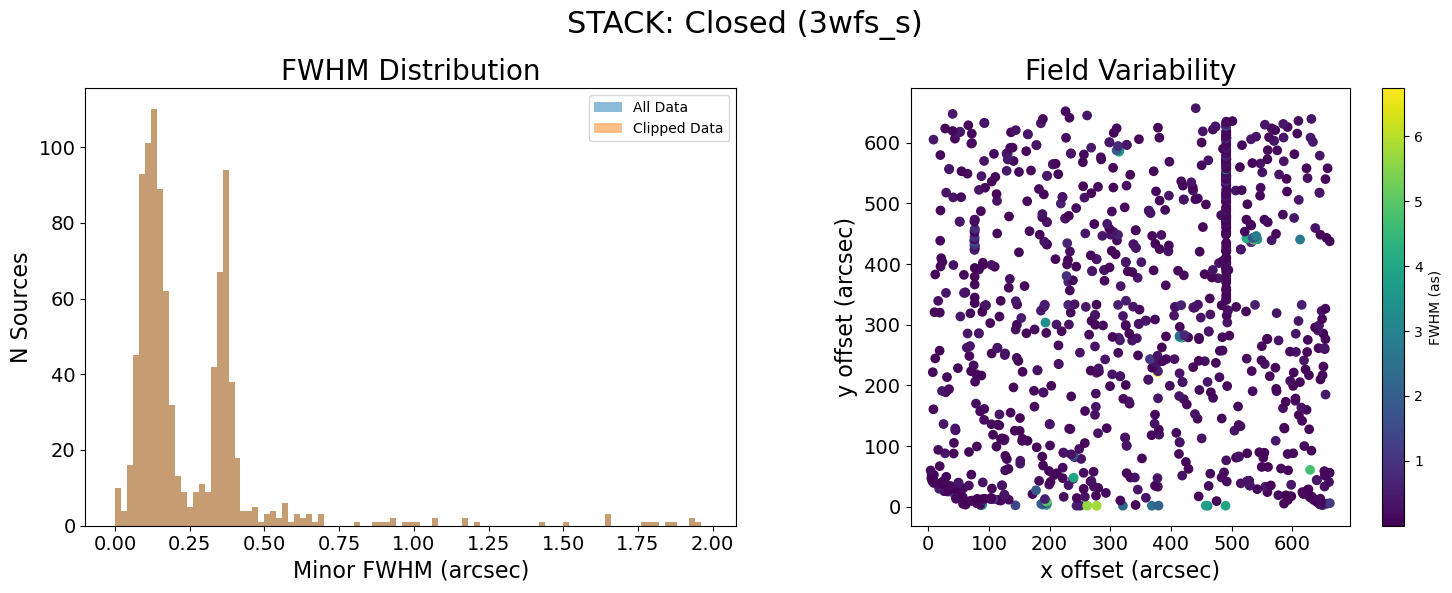

In [58]:
img_file = stack_dir + 'beehive_stack_n3wfs_c.fits' 
starlist = stack_dir + 'beehive_stack_n3wfs_c_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, "STACK: Closed (3wfs_s)")

### Closed loop (3wfs_w)

Median FWHM           = 0.125"
Median FWHM (clipped) = 0.123"
Mean FWHM             = 0.301"
Mean FWHM (clipped)   = 0.205"
Stddev FWHM           = 0.568"
Stddev FWHM (clipped) = 0.149"


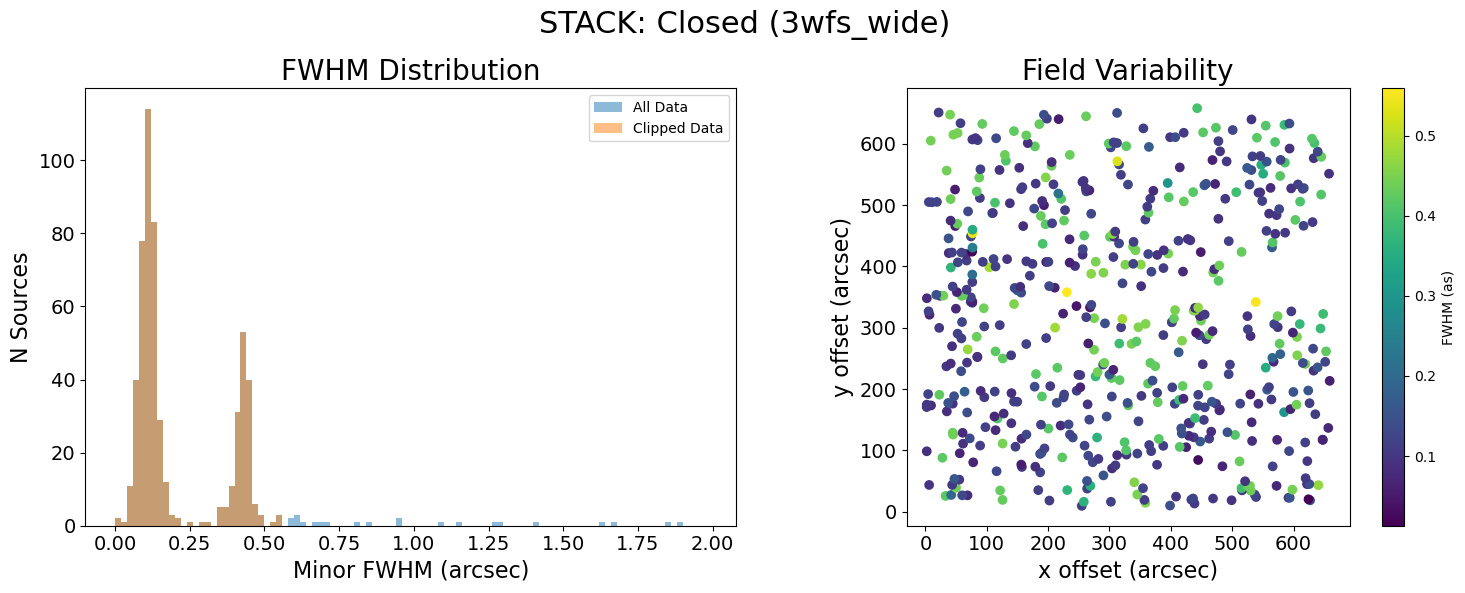

In [59]:
img_file = stack_dir + 'beehive_stack_n3wide_c.fits' 
starlist = stack_dir + 'beehive_stack_n3wide_c_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, "STACK: Closed (3wfs_wide)")

### Closed loop (5wfs)

Median FWHM           = 0.151"
Median FWHM (clipped) = 0.142"
Mean FWHM             = 4.771"
Mean FWHM (clipped)   = 0.187"
Stddev FWHM           = 117.642"
Stddev FWHM (clipped) = 0.107"


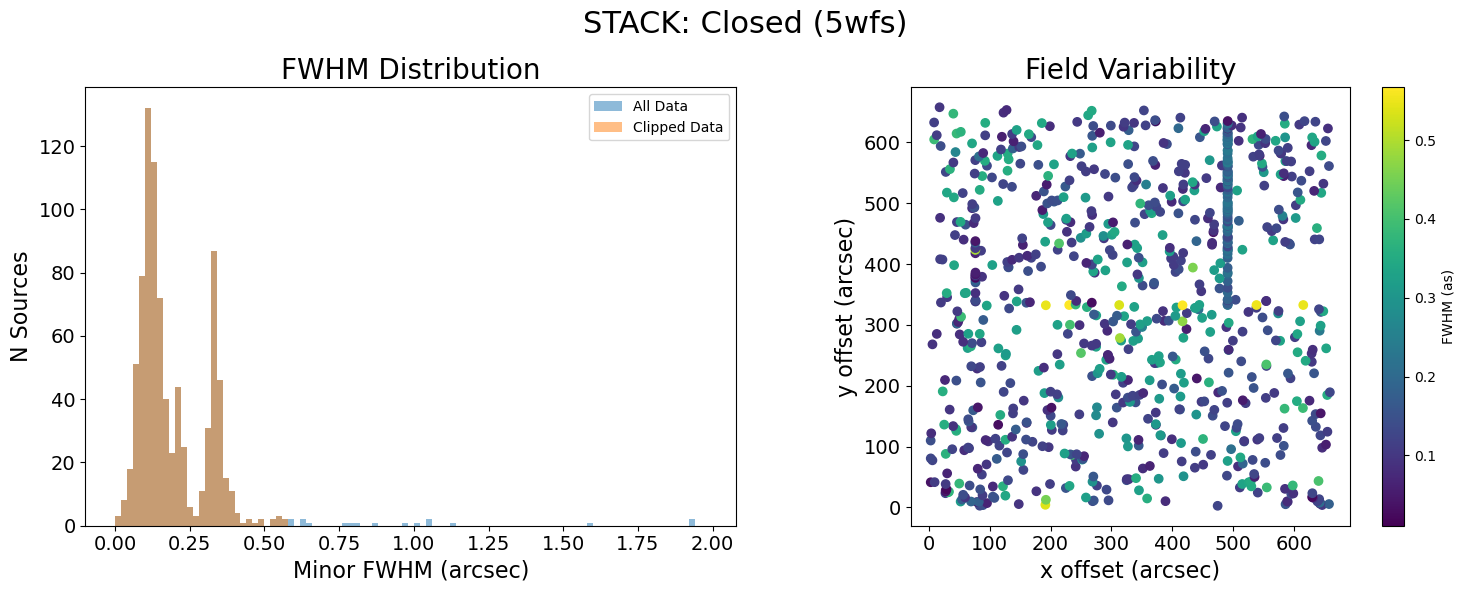

In [60]:
img_file = stack_dir + 'beehive_stack_n5wfs_c.fits'
starlist = stack_dir + 'beehive_stack_n5wfs_c_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, "STACK: Closed (5wfs)")